In [1]:
import librosa
import matplotlib.pyplot as plt

import numpy as np
import sounddevice as sd

In [2]:
samples, sampling_rate = librosa.load('sample_audio.wav', sr=None)

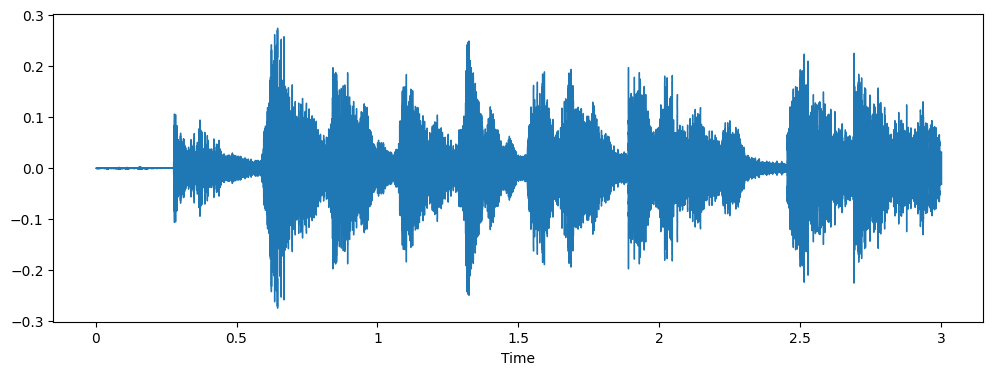

In [3]:
import librosa.display
plt.figure(figsize=(12, 4))
librosa.display.waveshow(samples, sr=sampling_rate)

In [4]:
from IPython.display import Audio
Audio('sample_audio.wav')

### Spectrogram

/var/folders/2y/yvcgcq_13qzbwfz4wh4nb76r0000gn/T/ipykernel_47293/2304845838.py:2: UserWarning: Trying to display complex-valued input. Showing magnitude instead.
  librosa.display.specshow(sgram)


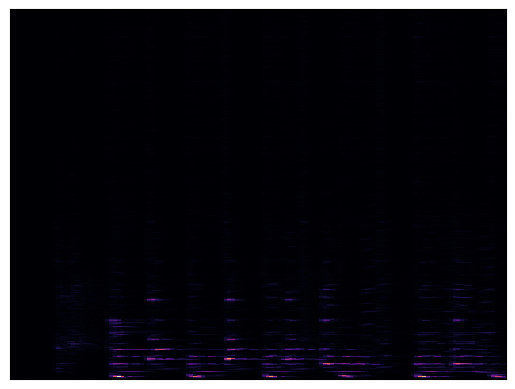

In [5]:
sgram = librosa.stft(samples)
librosa.display.specshow(sgram)

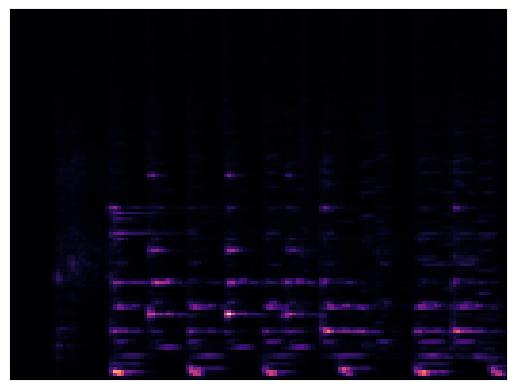

In [6]:
# use the mel-scale instead of raw frequency
sgram_mag, _ = librosa.magphase(sgram)
mel_scale_sgram = librosa.feature.melspectrogram(S=sgram_mag, sr=sampling_rate)
librosa.display.specshow(mel_scale_sgram)

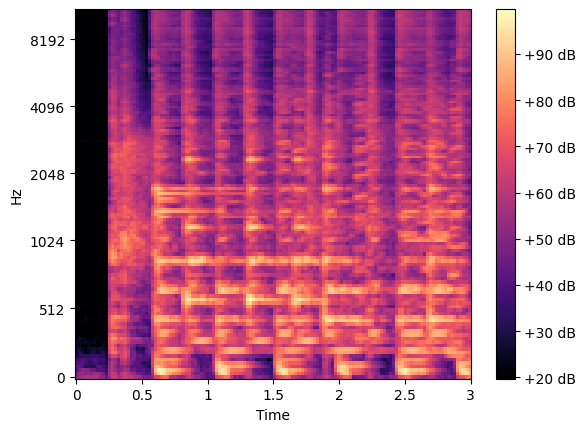

In [8]:
# use the decibel scale to get the final Mel Spectrogram
mel_sgram = librosa.amplitude_to_db(mel_scale_sgram, ref=np.min)
librosa.display.specshow(mel_sgram, sr=sampling_rate, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')

In [16]:
samples.shape[0]

66150

### Spectrogram with Torchaudio

In [19]:
import torch
import torchaudio

In [21]:
#metadata = torchaudio.info('sample_audio.wav')

In [28]:
waveform, sample_rate = torchaudio.load('sample_audio.wav')


In [29]:
def plot_specgram(waveform, sample_rate, title="Spectrogram"):
    waveform = waveform.numpy()
    num_channels, num_frames = waveform.shape
    print('num_channels: ', num_channels)
    print('num_frames: ', num_frames)
    figure, axes = plt.subplots(num_channels, 1)
    if num_channels == 1:
        axes = [axes]
    for c in range(num_channels):
        axes[c].specgram(waveform[c], Fs=sample_rate)
        if num_channels > 1:
            axes[c].set_ylabel(f"Channel {c+1}")
    figure.suptitle(title)
    plt.show(block=False)

num_channels:  1
num_frames:  66150


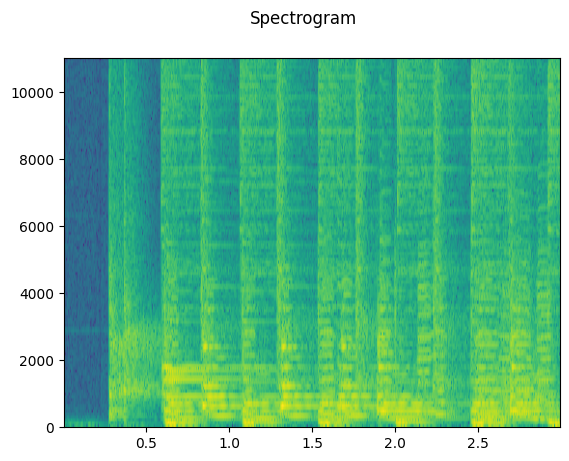

In [30]:
plot_specgram(waveform, sample_rate)
